# Logistic Regression

# P1: Introduction 
The dataset consists of several game result predictor (independent) variables and one target (dependent) variable, `win_or_defeat`. <br> Independent variables include the `spell_used`, `position`, `towers_damage`, `kill_death_ratio`, `controlling_time`, and so on.
  * spell_used
  * trap_used
  * character
  * position
  * location
  * assists
  * damage_amount
  * towers_damage
  * rooms_damage
  * deaths
  * money_total
  * kill_death_ratio
  * kills_total
  * level
  * controlling_time
  * total_damage
  * earned_damage
  * special_enemy_killed
  * room_kills
  * main_score
  * win_or_defeat

First, we perform data exploration to get a better understanding of the data. Then, we perform data preprocessing to prepare the data for the regression model. Finally, we train a regression model to predict the outcome.

In [1]:
data_link = "https://drive.google.com/file/d/1SGuWqcRJ1GvPO9RxzxjOAkCEN_RDJY9d/view?usp=sharing"

In [2]:
!pip install typing-extensions --upgrade
!pip install ydata-profiling
!pip install gdown

  Obtaining dependency information for typing-extensions from https://files.pythonhosted.org/packages/b7/f4/6a90020cd2d93349b442bfcb657d0dc91eee65491600b2cb1d388bc98e6b/typing_extensions-4.9.0-py3-none-any.whl.metadata
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.7 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 14.0.1 which is incompatible.
jupyterlab 4.0.5 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.0.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyte

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [4]:
!gdown 1SGuWqcRJ1GvPO9RxzxjOAkCEN_RDJY9d

Downloading...
From: https://drive.google.com/uc?id=1SGuWqcRJ1GvPO9RxzxjOAkCEN_RDJY9d
To: /kaggle/working/train.csv
100%|█████████████████████████████████████████| 493k/493k [00:00<00:00, 131MB/s]


Load the dataset as a dataframe. Then, check for any null values and remove the rows containing them. Finally, display the first 10 rows. Also check for duplicate rows and delete them, if there are any. Report some other metrics like `Kurtosis` and `Interquartile range (IQR)` (hint: search and read about ydata-profiling). 

In [5]:
ds = pd.read_csv('train.csv')

print("null values : ")
print(ds.isnull().sum())

ds.dropna(inplace=True)
print('-----------------------------------------------------')
print(ds.head(10))
print('-----------------------------------------------------')

print("duplicate counts : ")
print(ds.duplicated().sum())

ds.drop_duplicates(inplace=True)
print('-----------------------------------------------------')
print(ds.head(10))
print('-----------------------------------------------------')

null values : 
Unnamed: 0              0
spell_used              0
trap_used               0
character               0
position                0
location                1
assists                 1
damage_amount           0
towers_damage           0
rooms_damage            0
deaths                  0
money_total             0
kill_death_ratio        1
kills_total             0
level                   0
controlling_time        0
total_damage            0
earned_damage           0
special_enemy_killed    0
room_kills              0
main_score              0
win_or_defeat           0
dtype: int64
-----------------------------------------------------
    Unnamed: 0  spell_used  trap_used    character   position       location  \
0            0           4         12  TwistedFate  Side.blue  Lane.top_lane   
2            2           4         12        Ziggs  Side.blue  Lane.bot_lane   
3            3           4          7        Senna   Side.red  Lane.bot_lane   
5            5           4

In [6]:

print(ds.select_dtypes(include=[np.number]).kurtosis())

print('-----------------------------------------------------')

print(ds.describe(include=[np.number]).T)

Unnamed: 0              -1.199976
spell_used              -0.771228
trap_used               -1.560519
assists                  1.796163
damage_amount           20.631801
towers_damage            3.060186
rooms_damage            20.631801
deaths                   0.372563
money_total              0.326406
kill_death_ratio         9.973199
kills_total              1.438422
level                   -0.384155
controlling_time        11.943538
total_damage             0.696798
earned_damage            1.792284
special_enemy_killed    -1.157044
room_kills               2.527769
main_score               3.950108
dtype: float64
-----------------------------------------------------
                       count           mean           std     min      25%  \
Unnamed: 0            4613.0    2308.996098   1331.809470     0.0   1156.0   
spell_used            4613.0       6.707782      3.976734     1.0      4.0   
trap_used             4613.0       8.430739      4.312468     1.0      4.0   
assists

Calculate the mean, standard deviation, min and max value for each non object column.

In [7]:
print("duplicate counts:")
print(ds.duplicated().sum())
ds.drop_duplicates(inplace=True)
print(ds.head(10))

duplicate counts:
0
    Unnamed: 0  spell_used  trap_used    character   position       location  \
0            0           4         12  TwistedFate  Side.blue  Lane.top_lane   
2            2           4         12        Ziggs  Side.blue  Lane.bot_lane   
3            3           4          7        Senna   Side.red  Lane.bot_lane   
5            5           4         11       Rengar   Side.red    Lane.jungle   
6            6           4         12        Ziggs  Side.blue  Lane.bot_lane   
7            7           4         14        Karma  Side.blue   Lane.utility   
8            8           3          4         Zyra   Side.red   Lane.utility   
9            9           4         12       Graves   Side.red  Lane.mid_lane   
10          10          11          4         Olaf  Side.blue    Lane.jungle   
11          11          14         12         Kled   Side.red  Lane.top_lane   

    assists  damage_amount  towers_damage  rooms_damage  ...  \
0       9.0           1862         

# P2: Data Exploration 
In this section, we perform some data exploration to get a better understanding of the data.

1- Show number of unique value for `location` column 

In [8]:
print(ds['location'].value_counts())

print('-----------------------------------------------------')

print(ds['location'].unique())

location
Lane.jungle      978
Lane.top_lane    955
Lane.mid_lane    913
Lane.bot_lane    902
Lane.utility     865
Name: count, dtype: int64
-----------------------------------------------------
['Lane.top_lane' 'Lane.bot_lane' 'Lane.jungle' 'Lane.utility'
 'Lane.mid_lane']


2- Plot correlation matrix between features 

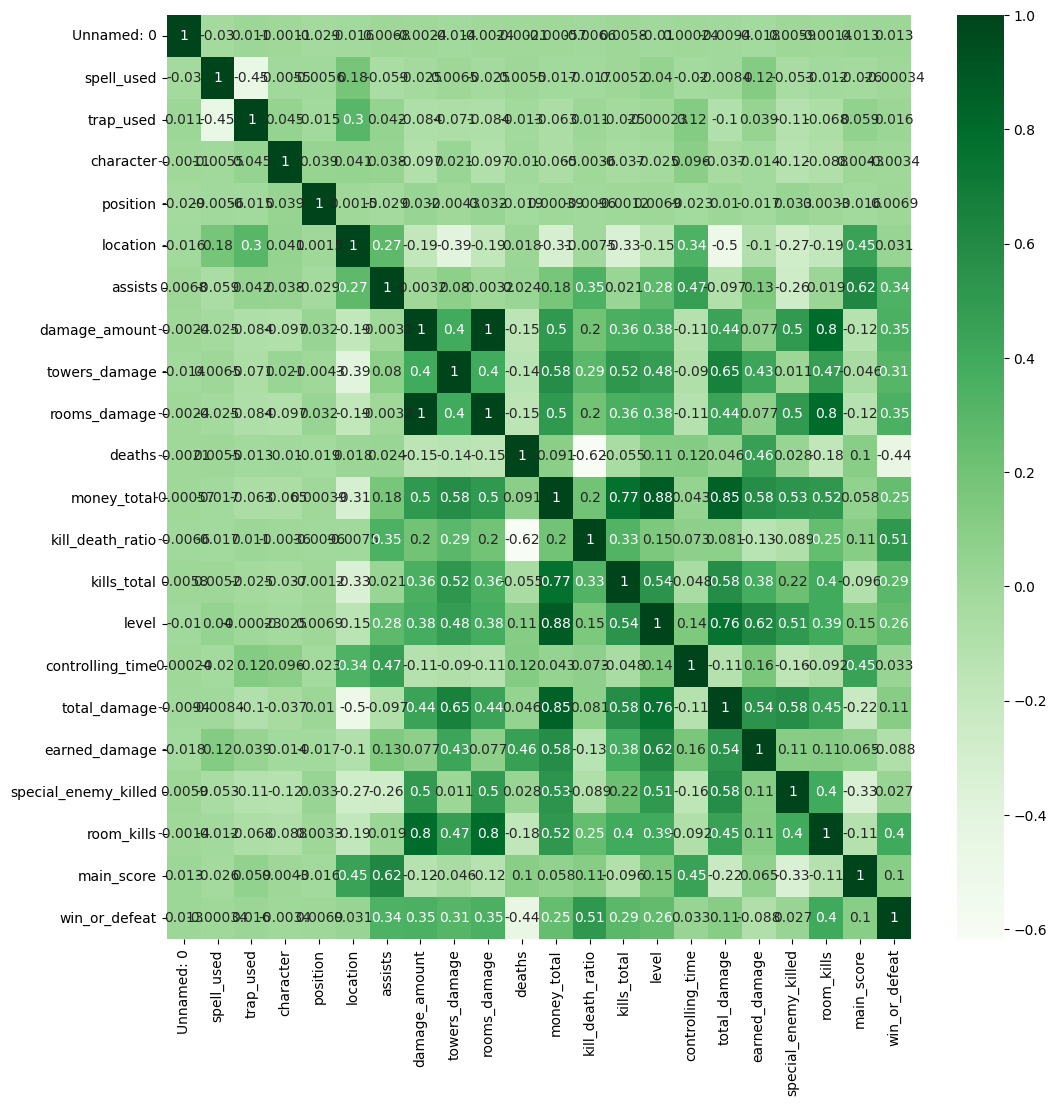

In [9]:
for item in ds.select_dtypes(exclude=[np.number]).columns:
    ds[item] = preprocessing.LabelEncoder().fit_transform(ds[item])
    
plt.figure(figsize=(12,12))
sns.heatmap(ds.corr(), cmap='Greens', annot=True)
plt.show()

3- Plot bar plot of combined `position` and `location` columns (hint: use crosstab in pandas) 

<Axes: xlabel='position'>

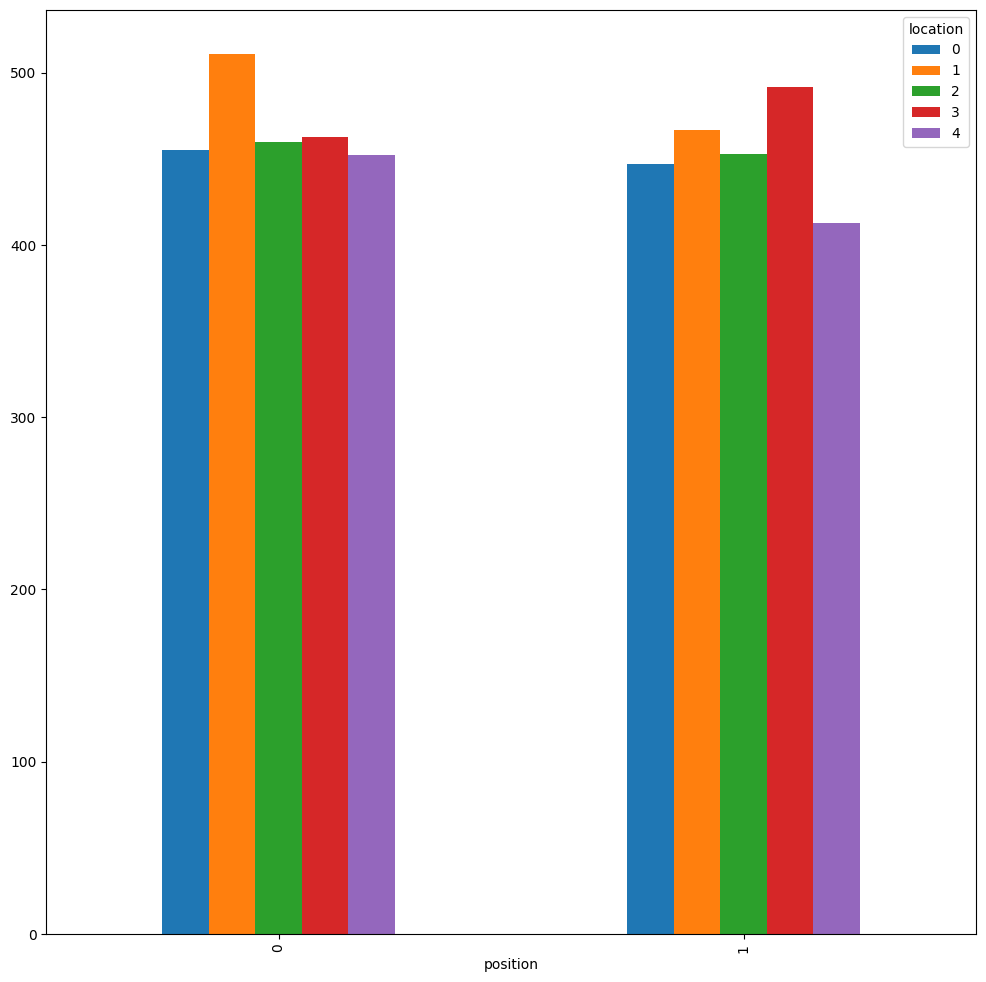

In [10]:
pd.crosstab(ds['position'], ds['location']).plot(kind='bar', figsize=(12,12))

4- Plot pie chart of `level` column 

<Axes: ylabel='count'>

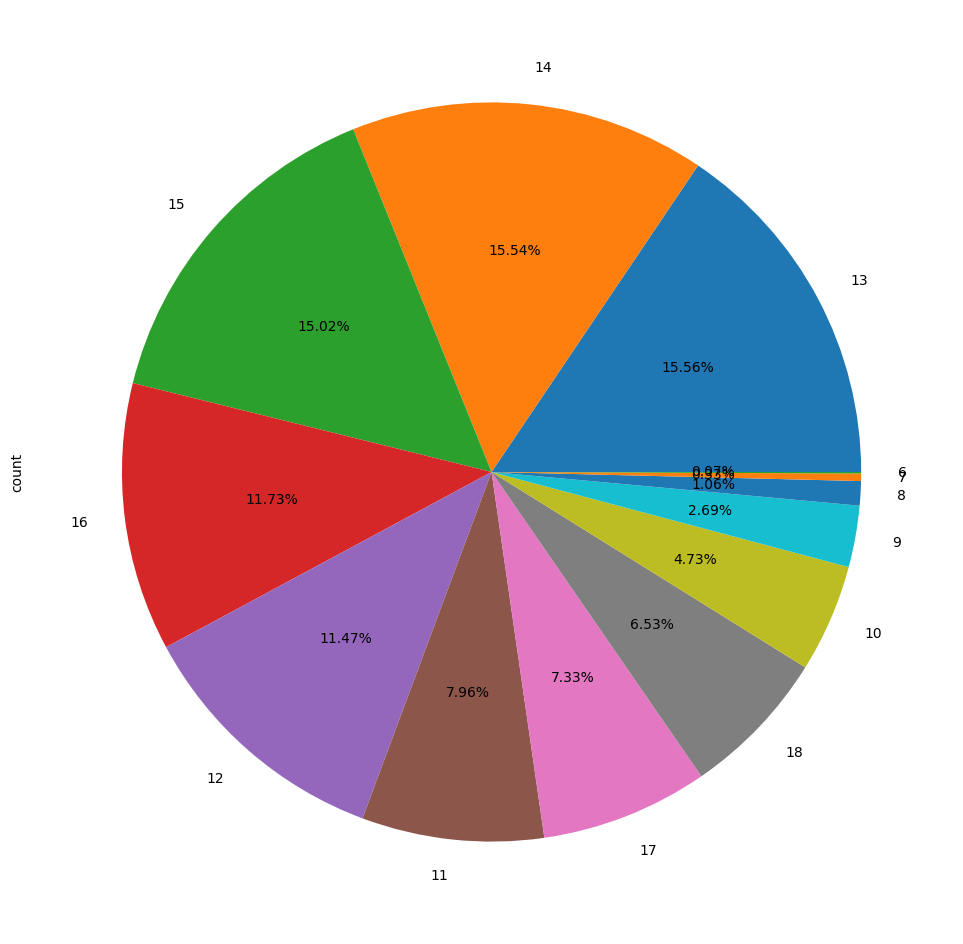

In [11]:
ds['level'].value_counts().plot(kind='pie', autopct='%1.2f%%', figsize=(12,12))

5- Plot box-plot on combination of `location` and `earned_damage` columns 

<Axes: title={'center': 'earned_damage'}, xlabel='location'>

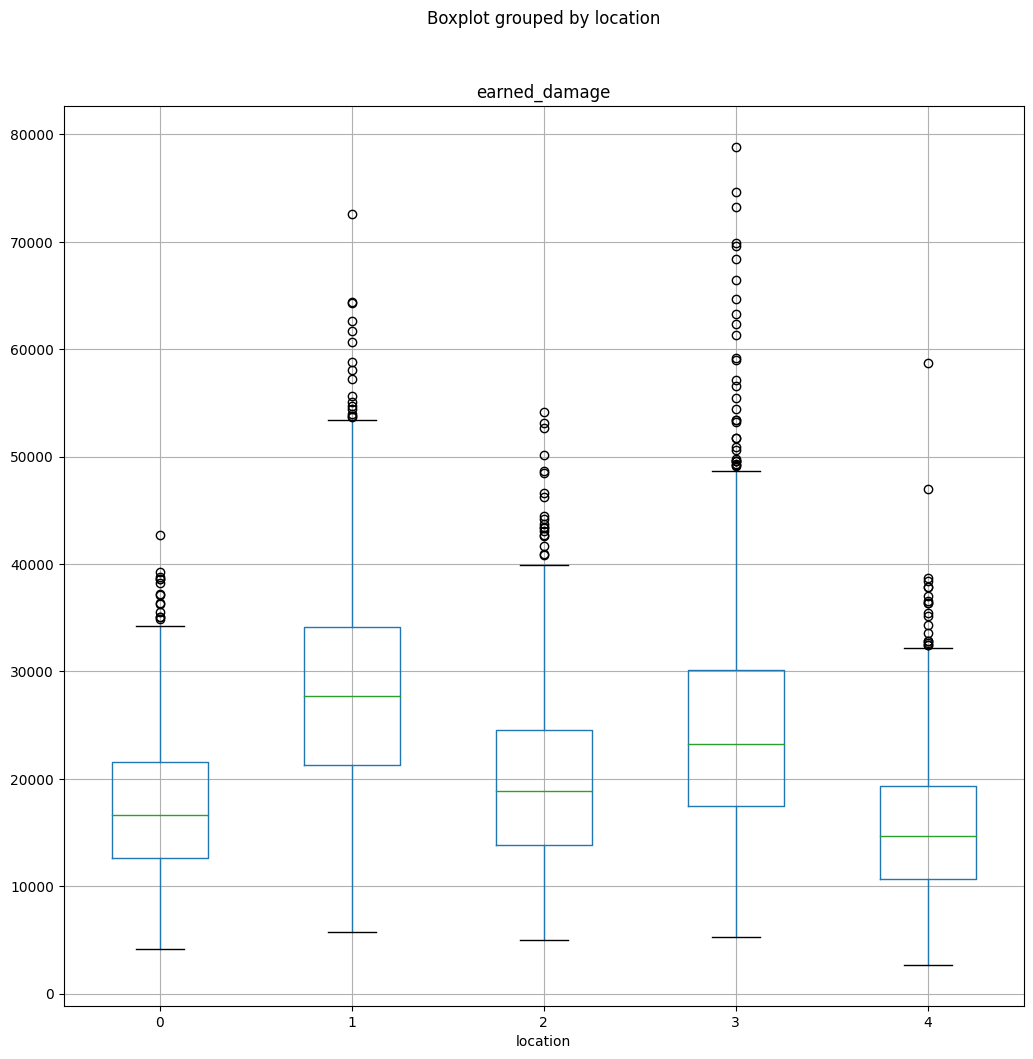

In [12]:
ds.boxplot(column='earned_damage', by='location', figsize=(12,12))

6- Plot histplot of `spell_used` column (10 bins). 

<Axes: >

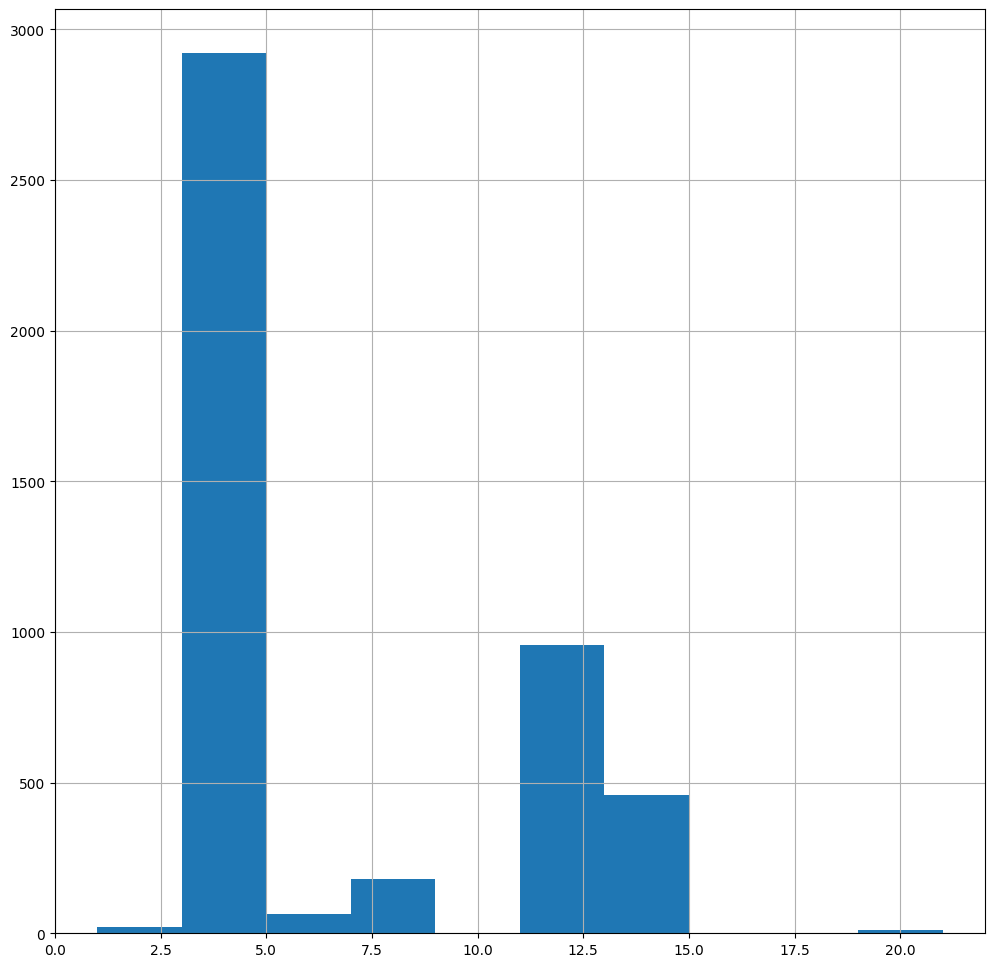

In [13]:
ds['spell_used'].hist(figsize=(12,12))

# P3: Pre-processing 
In this section, we perform some pre-processing to make the data ready for model.

First of all, in your heatmap, there are some variables that have very low correlation with your dependent variable. You can delete those features that their absulote value of correlation with dependent variable is less than 0.015.

In [14]:
correlation_matrix = ds.corr()
weak_correlations = correlation_matrix["win_or_defeat"][abs(correlation_matrix["win_or_defeat"]) < 0.015]
print(weak_correlations)
ds.drop(columns=weak_correlations.index, inplace=True)
print(ds.head(10))


Unnamed: 0    0.012904
spell_used   -0.000336
character    -0.003412
position      0.006932
Name: win_or_defeat, dtype: float64
    trap_used  location  assists  damage_amount  towers_damage  rooms_damage  \
0          12         3      9.0           1862           5119          1862   
2          12         0      3.0            543           2754           543   
3           7         0      4.0           1547           1547          1547   
5          11         1      7.0           1564          16053          1564   
6          12         0      9.0          19665          20431         19665   
7          14         4      4.0            740            997           740   
8           4         4      8.0              0            123             0   
9          12         2      5.0           3277           3277          3277   
10          4         1      3.0              0           7063             0   
11         12         3      3.0           3646           4463          

Next step is to encode labels. Columns that are not numeric ('string' or 'object'), can't be given to the model, so you should convert them to numeric values <br> (hint: use sklearn LabelEncoder).

In [15]:
for item in ds.select_dtypes(exclude=[np.number]).columns:
    ds[item] = preprocessing.LabelEncoder().fit_transform(ds[item])
    
print(ds.head(10))

    trap_used  location  assists  damage_amount  towers_damage  rooms_damage  \
0          12         3      9.0           1862           5119          1862   
2          12         0      3.0            543           2754           543   
3           7         0      4.0           1547           1547          1547   
5          11         1      7.0           1564          16053          1564   
6          12         0      9.0          19665          20431         19665   
7          14         4      4.0            740            997           740   
8           4         4      8.0              0            123             0   
9          12         2      5.0           3277           3277          3277   
10          4         1      3.0              0           7063             0   
11         12         3      3.0           3646           4463          3646   

    deaths  money_total  kill_death_ratio  kills_total  level  \
0        9         9152          1.222222            2

now we need to normalize columns of the dataframe which causes our model to converge better and prevent focusing on some specific number of columns. we use 'Z normalization' for this purpose.

be careful not to normalize 'win_or_defeat' column!

In [16]:
ss = StandardScaler()
cols_dif = ds.columns.difference(['win_or_defeat'])
ds[cols_dif] = ss.fit_transform(ds[cols_dif])

print(ds.head(10))

    trap_used  location   assists  damage_amount  towers_damage  rooms_damage  \
0    0.827751  0.731026  0.143811      -0.243388      -0.422104     -0.243388   
2    0.827751 -1.416887 -0.920181      -0.656293      -0.656259     -0.656293   
3   -0.331804 -1.416887 -0.742849      -0.341997      -0.775762     -0.341997   
5    0.595840 -0.700916 -0.210853      -0.336675       0.660454     -0.336675   
6    0.827751 -1.416887  0.143811       5.329738       1.093912      5.329738   
7    1.291572  1.446998 -0.742849      -0.594624      -0.830216     -0.594624   
8   -1.027537  1.446998 -0.033521      -0.826276      -0.916750     -0.826276   
9    0.827751  0.015055 -0.565517       0.199570      -0.604477      0.199570   
10  -1.027537 -0.700916 -0.920181      -0.826276      -0.229632     -0.826276   
11   0.827751  0.731026 -0.920181       0.315083      -0.487053      0.315083   

      deaths  money_total  kill_death_ratio  kills_total     level  \
0   1.079311    -0.493218         -0.6

# P4: Regression Model 

Split the data to train, test, and validation using sklearn's `train_test_split`. Use 10% of the data for the testing phase, another 10% for the validation phase, and the remaining for the training phase.

In [17]:
X = ds.drop(['win_or_defeat'], axis=1).values
y = ds['win_or_defeat'].values
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.2, random_state=43)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=43)

### Custom Regression Model

1- Complete custom logistic regression functions below 

In [18]:
class CustomLogisticRegression():
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.bias = None
        self.weights = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def loss(self, X, y):
        f = self.sigmoid(np.dot(X, self.weights) + self.bias)
        return -np.mean((y * np.log(f)) + ((1 - y) * np.log(1 - f)))

    def loss_backward(self, X, y):
        f = self.sigmoid(np.dot(X, self.weights) + self.bias)
        dw = np.dot(X.T, (f - y)) / y.shape[0]
        db = np.mean(f - y)
        return dw, db

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for i in range(self.num_iterations):
            dw, db = self.loss_backward(X, y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return np.round(self.sigmoid(z))

    def accuracy(self, y_true, y_pred):
        correct_predictions = np.sum(y_true == y_pred)
        return correct_predictions / len(y_true)

### Torch Regression Model

2- Implement the Logistic Regression Model. This time, use Pytorch! 

In [19]:
class CustomLogisticRegression:
    
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        return -(1/m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for _ in range(self.num_iterations):
            model = self.sigmoid(np.dot(X, self.weights) + self.bias)
            dw = (1/m) * np.dot(X.T, (model - y))
            db = (1/m) * np.sum(model - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        model = self.sigmoid(np.dot(X, self.weights) + self.bias)
        y_pred = np.where(model > 0.5, 1, 0)
        return y_pred

### SK-Learn Regression Model

3- Now train a Logistic Regression using SK-Learn 

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

sklearn_model = LogisticRegression()
sklearn_model.fit(X_train, y_train)
sklearn_prediction = sklearn_model.predict(X_val)
print("sklearn accuracy : ", accuracy_score(y_val, sklearn_prediction))

sklearn accuracy :  0.8524945770065075


### Predicting the output for the testing data
4- Train Custom Logistic Regression and Torch Logistic Regression models and then Predict the `Outcome` for the testing samples using both models. 

In [21]:
my_model = CustomLogisticRegression()
my_model.fit(X_train, y_train)
my_prediction = my_model.predict(X_val)
print("my accuracy : ", accuracy_score(y_val, my_prediction))

my accuracy :  0.8373101952277657


# P5: Evaluation 

1- Complete the metric codes. then evaluate all the models results using the implemented metrices and compare them. 

In [22]:
class ClassificationMetrics:

    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
        self.tp, self.fp, self.fn, self.tn = self.compute_confusion_matrix_elements()

    def compute_confusion_matrix_elements(self):
        tp = np.sum((self.y_true == 1) & (self.y_pred == 1))
        fp = np.sum((self.y_true == 0) & (self.y_pred == 1))
        fn = np.sum((self.y_true == 1) & (self.y_pred == 0))
        tn = np.sum((self.y_true == 0) & (self.y_pred == 0))
        return tp, fp, fn, tn

    def accuracy(self):
        total = len(self.y_true)
        correct = self.tp + self.tn
        return correct / total

    def precision(self):
        return self.tp / (self.tp + self.fp) if (self.tp + self.fp) > 0 else 0

    def recall(self):
        return self.tp / (self.tp + self.fn) if (self.tp + self.fn) > 0 else 0

    def f1_score(self):
        precision = self.precision()
        recall = self.recall()
        return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    def confusion_matrix(self):
        return np.array([[self.tp, self.fp], [self.fn, self.tn]])


In [23]:
metrics = ClassificationMetrics(y_val, sklearn_prediction)
print("Accuracy:", metrics.accuracy())
print("Precision:", metrics.precision())
print("Recall:", metrics.recall())
print("F1 Score:", metrics.f1_score())
print("Confusion Matrix:\n", metrics.confusion_matrix())

print('-----------------------------------------------------')

metrics = ClassificationMetrics(y_val, my_prediction)
print("Accuracy:", metrics.accuracy())
print("Precision:", metrics.precision())
print("Recall:", metrics.recall())
print("F1 Score:", metrics.f1_score())
print("Confusion Matrix:\n", metrics.confusion_matrix())

Accuracy: 0.8524945770065075
Precision: 0.8492063492063492
Recall: 0.8770491803278688
F1 Score: 0.8629032258064516
Confusion Matrix:
 [[214  38]
 [ 30 179]]
-----------------------------------------------------
Accuracy: 0.8373101952277657
Precision: 0.8421052631578947
Recall: 0.8524590163934426
F1 Score: 0.8472505091649694
Confusion Matrix:
 [[208  39]
 [ 36 178]]


# P6: Neural Net 

Implement a neural net containing the following layers: LSTM, CNN, Pooling and Dense (Linear). Train the neural network on the training data and tune its hyperparameters using the validation data. Finally, print a classification report indicating how well its doing on the testing data.

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
X = ds.drop(['win_or_defeat'], axis=1).values
y = ds['win_or_defeat'].values

# Data normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset
X_train, X_rest, y_train, y_rest = train_test_split(X_scaled, y, test_size=0.2, random_state=43)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=43)

class FeedforwardNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FeedforwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Convert data to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# Create datasets and loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Model initialization
input_size = X_train.shape[1]
hidden_size = 64
output_size = 1
model = FeedforwardNN(input_size, hidden_size, output_size)

# Loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0003)

# Training loop
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    print("Epoch %d/%d, Loss: %.4f" % (epoch + 1, num_epochs, average_loss))

# Accuracy calculation function
def calculate_accuracy(predictions, targets):
    binary_predictions = (predictions >= 0.5).float()
    correct = (binary_predictions == targets).float().sum()
    accuracy = correct / targets.numel()
    return accuracy.item()

# Evaluation
model.eval()
with torch.no_grad():
    val_outputs = torch.cat([model(inputs) for inputs, _ in val_loader]).squeeze()
    val_labels = torch.cat([labels for _, labels in val_loader])
    val_accuracy = calculate_accuracy(val_outputs, val_labels)
    val_loss = criterion(val_outputs, val_labels)
    print("Validation accuracy: %.4f, Loss: %.4f" % (val_accuracy, val_loss))



Epoch 1/30, Loss: 0.6576
Epoch 2/30, Loss: 0.5460
Epoch 3/30, Loss: 0.4692
Epoch 4/30, Loss: 0.4212
Epoch 5/30, Loss: 0.3930
Epoch 6/30, Loss: 0.3775
Epoch 7/30, Loss: 0.3676
Epoch 8/30, Loss: 0.3604
Epoch 9/30, Loss: 0.3550
Epoch 10/30, Loss: 0.3501
Epoch 11/30, Loss: 0.3469
Epoch 12/30, Loss: 0.3450
Epoch 13/30, Loss: 0.3424
Epoch 14/30, Loss: 0.3396
Epoch 15/30, Loss: 0.3374
Epoch 16/30, Loss: 0.3361
Epoch 17/30, Loss: 0.3339
Epoch 18/30, Loss: 0.3329
Epoch 19/30, Loss: 0.3314
Epoch 20/30, Loss: 0.3297
Epoch 21/30, Loss: 0.3296
Epoch 22/30, Loss: 0.3275
Epoch 23/30, Loss: 0.3283
Epoch 24/30, Loss: 0.3264
Epoch 25/30, Loss: 0.3250
Epoch 26/30, Loss: 0.3253
Epoch 27/30, Loss: 0.3238
Epoch 28/30, Loss: 0.3241
Epoch 29/30, Loss: 0.3207
Epoch 30/30, Loss: 0.3207
Validation accuracy: 0.8503, Loss: 0.3462
